# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organising Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

Sam has written an implementation of a Self Organising Map. Consider the following criteria when assessing Sam's code:

- Could the code be made more efficient? A literal interpretation of the instructions above is not necessary.
  - Using too many python for loops. Must us numpy and vectors.
- Is the code best structured for later use by other developers and in anticipation of productionisation?
  - Nope, with this code it is very hard to understand what is happening at a glance
    - Make a class
    - Make internal functions for BMU, neighbourhood radius, learning rate and influence
- How would you approach productionising this application?
- Anything else you think is relevant.

In [5]:
# kohonen.py
import numpy as np


def train(input_data, n_max_iterations, width, height, init_weights=None):
    σ0 = max(width, height) / 2
    α0 = 0.1
    weights = (
        init_weights
        if init_weights is not None
        else np.random.random((width, height, 3))
    )
    λ = n_max_iterations / np.log(σ0)
    for t in range(n_max_iterations):
        σt = σ0 * np.exp(-t / λ)
        αt = α0 * np.exp(-t / λ)
        for vt in input_data:
            bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))
            for x in range(width):
                for y in range(height):
                    di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2))
                    θt = np.exp(-(di**2) / (2 * (σt**2)))
                    weights[x, y] += αt * θt * (vt - weights[x, y])
    return weights

## Optimised code

- Use vector broad casting
- numpy vector operations instead of loops
- Update can be done without looping for x and y with meshgrid and broadcast

In [6]:
def optimised_train(input_data, n_max_iterations, width, height, init_weights=None):
    init_learning_rate = 0.1
    init_radius = max(width, height) / 2
    time_constant = n_max_iterations / np.log(init_radius)
    
    weights = (
        init_weights
        if init_weights is not None
        else np.random.random((width, height, input_data.shape[-1]))
    )
    coord_x, coord_y = np.meshgrid(np.arange(width), np.arange(height), indexing="ij")
    for t in range(n_max_iterations):
        current_radius = init_radius * np.exp(-t / time_constant)
        current_learning_rate = init_learning_rate * np.exp(-t / time_constant)
        for vt in input_data:
            bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))

            influence = np.sqrt((coord_x - bmu_x) ** 2 + (coord_y - bmu_y) ** 2)
            influence_decay = np.exp(-(influence**2) / (2 * current_radius**2))
            # broadcasting
            influence_decay = influence_decay.reshape(
                influence_decay.shape + (1,) * (weights.ndim - influence_decay.ndim)
            )

            weights += current_learning_rate * influence_decay * (vt - weights)
    return weights

# Production - Kohonen Map

- Logger class
- Kohonen Map class
- Model registry
- Build, retraining, and inference pipelines
- Data drift monitoiring
- Model training monitoring

## Logger

A `Telemetry` class which can log, logs to a jsonl file. It is a helper class, for the telemetry, so no need to look too much at it.

In [7]:
import time, os, logging

class Telemetry:
    def __init__(self, level=logging.INFO, log_path='.logs/telemetry.log'):
        """Initializes the telemetry system with a logger."""
        logger_name = 'TelemetryLogger'
        if logger_name in logging.Logger.manager.loggerDict:
            existing_logger = logging.getLogger(logger_name)
            existing_logger.handlers.clear()
        self.__logger = logging.getLogger(logger_name)
        self.__logger.setLevel(level)
        os.makedirs(os.path.dirname(log_path), exist_ok=True)
        handler = logging.FileHandler(log_path)
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
        handler.setFormatter(formatter)
        self.__logger.addHandler(handler)

    def log(self, message: str, level=logging.INFO, **kwargs):
        """Logs a message with a given level."""
        self.__logger.log(level, message, extra=kwargs)

    def error(self, error: Exception):
        self.__logger.log(logging.ERROR, f"[Training Error] f{str(error)}", extra=dict(error=error))

## Production worthy Kohonen Maps

- Make is a class
- Attach telemetry
- The private methods must tell the steps in the algorithm
- Use numpy boradcasts and vector algorithms for faster iterations
- Add inference endpoint.
- Add versioning for model code, param change, and retraining
- Add checkpointing
- Add data drift measurements (Improvement -> Instead of it being a part of model code make it a different class and put it some where else)
    - Metric (TODO)
        - Mean
        - St deviation
        - Skewness
        - Kurtios (outlier detection)
- Add model training metrics
    - Mean distance - Quantisation error
    - Need to do more researhc

In [8]:
from typing import Tuple, Optional
import numpy as np
from tqdm import tqdm
import os, pickle


class KohonenMap:
    @staticmethod
    def current_code_version() -> int:
        return 1 # Update this when you update the kohonen maps code
        

    """
    Implementation of a Kohonen Self-Organizing Map (SOM).
    """

    def __init__(
        self,
        width: int,
        height: int,
        input_dim: int,
        model_version: int = 0, # Model build/ code version
        model_last_revision: int = 0, # Model training version
        max_iterations: int = 1000,
        learning_rate: float = 0.1,
        weights: Optional[np.ndarray] = None,
        telemetry: Telemetry = Telemetry(),
        checkpoint_dir: str = './.checkpoints'
    ):
        """
        Initializes a Kohonen Map with the given dimensions and training parameters.

        :param width: Width of the map.
        :param height: Height of the map.
        :param input_dim: Number of dimensions of the input vectors.
        :param max_iterations: Maximum number of iterations for training.
        :param learning_rate: Initial learning rate.
        :param weights: Initial weights of the SOM. Randomly initialized if None.
        :param telemetry: Telemetry object for logging.
        :param checkpoint_dir: Directory where checkpoints will be saved.
        """
        self.model_code_version: int = KohonenMap.current_code_version()
        self.model_version = model_version
        self.model_last_revision = model_last_revision
        self.width = width
        self.height = height
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.weights = (
            weights
            if weights is not None
            else np.random.random((width, height, input_dim))
        )
        assert self.weights.shape == (
            width,
            height,
            input_dim,
        ), f"The weights must be of shape {(width, height, input_dim)}. The given is {self.weights.shape}"
        self.max_iterations = max_iterations
        self.meshgrid = np.meshgrid(np.arange(width), np.arange(height), indexing="ij")
        self.init_radius = max(width, height) / 2
        self.time_constant = max_iterations / np.log(self.init_radius)
        self.telemetry = telemetry
        self.checkpoint_dir = checkpoint_dir
        os.makedirs(self.checkpoint_dir, exist_ok=True)
        self.training_data_stats = None

    def __get_bmu(self, vector: np.ndarray) -> Tuple[int, int]:
        """
        Identifies the best matching unit (BMU) for a given input vector.

        :param vector: Input vector.
        :return: Tuple of indices for the BMU.
        """
        self.telemetry.log(
            "Entered __get_bmu function", logging.DEBUG, input=dict(vector=vector)
        )
        bmu = np.argmin(np.sum((self.weights - vector) ** 2, axis=2))
        return np.unravel_index(bmu, (self.width, self.height))

    def __calculate_influence(
        self, bmu: Tuple[int, int], current_radius: float
    ) -> np.ndarray:
        """
        Calculates the influence of the BMU over the map's neurons.

        :param bmu: Best matching unit (BMU) indices.
        :param current_radius: Current neighborhood radius.
        :return: Influence matrix.
        """
        self.telemetry.log(
            "Entered __calculate_influence function",
            logging.DEBUG,
            input=dict(bmu=bmu, current_radius=current_radius),
        )
        bmu_x, bmu_y = bmu
        coord_x, coord_y = self.meshgrid
        influence = np.sqrt((coord_x - bmu_x) ** 2 + (coord_y - bmu_y) ** 2)
        influence_decay = np.exp(-(influence**2) / (2 * current_radius**2))
        return influence_decay.reshape(
            influence_decay.shape + (1,) * (self.weights.ndim - influence_decay.ndim)
        )

    def __save_checkpoint(self, iteration: int):
        """
        Saves a checkpoint of the current model state.

        :param iteration: The current training iteration.
        """
        checkpoint_file = os.path.join(
            self.checkpoint_dir, f"checkpoint_{self.model_code_version}.{self.model_version}.{self.model_last_revision}.{iteration}.pkl"
        )
        checkpoint_data = {
            "iteration": iteration,
            "weights": self.weights,
            "learning_rate": self.learning_rate,
            "model_code_version": self.model_code_version,
            "model_version": self.model_version,
            "model_last_revision": self.model_last_revision,
        }
        with open(checkpoint_file, 'wb') as f:
            pickle.dump(checkpoint_data, f)
        self.telemetry.log(f"Checkpoint saved at iteration {iteration}", logging.INFO)

    def __load_checkpoint(self) -> Optional[int]:
        """
        Loads the most recent checkpoint if available.

        :return: The iteration number from the checkpoint or None if no checkpoint exists.
        """
        checkpoint_files = [f for f in os.listdir(self.checkpoint_dir) if f.startswith(f"checkpoint_{self.model_code_version}.{self.model_version}.{self.model_last_revision}")]
        if not checkpoint_files:
            return None
        
        checkpoint_files = list(map(lambda x: os.path.join(self.checkpoint_dir, x), checkpoint_files))
        latest_checkpoint = max(checkpoint_files, key=os.path.getctime)
        checkpoint_file = latest_checkpoint
        
        with open(checkpoint_file, 'rb') as f:
            checkpoint_data = pickle.load(f)
        
        self.weights = checkpoint_data["weights"]
        self.learning_rate = checkpoint_data["learning_rate"]
        self.model_code_version = checkpoint_data["model_code_version"]
        self.model_version = checkpoint_data["model_version"]
        self.model_last_revision = checkpoint_data["model_last_revision"]
        
        iteration = checkpoint_data["iteration"]
        self.telemetry.log(f"Loaded checkpoint from iteration {iteration}", logging.INFO)
        return iteration

    def __delete_checkpoints(self):
        """
        Deletes all checkpoint files in the checkpoint directory.
        """
        try:
            checkpoint_files = [f for f in os.listdir(self.checkpoint_dir) if f.startswith(f"checkpoint_{self.model_code_version}.{self.model_version}.{self.model_last_revision}")]
            for file_name in checkpoint_files:
                os.remove(os.path.join(self.checkpoint_dir, file_name))
            self.telemetry.log("All checkpoints have been deleted.", logging.INFO)
        except Exception as e:
            self.telemetry.error(e)

    def __train(self, input_data: np.ndarray, validation_data: np.ndarray, training_checkpoint: int):
        """
        Trains the Kohonen map using the provided input data.

        :param input_data: Input data array.
        """
        assert (
            len(input_data.shape) == 2 and input_data.shape[-1] == self.input_dim
        ), f"The input_data must be of shape (N, {self.input_dim}). The given is {input_data.shape}"

        # Resume iterations just in case
        start_iteration = self.__load_checkpoint() or 0

        progress_bar = tqdm(
            range(start_iteration, self.max_iterations),
            total=self.max_iterations,
            desc="Kohonen fitting iterations",
            initial=start_iteration
        )

        for iteration in progress_bar:
            start_time = time.time()
            ## Kohonene fitting - start
            current_radius = self.init_radius * np.exp(-iteration / self.time_constant)
            current_learning_rate = self.learning_rate * np.exp(
                -iteration / self.time_constant
            )
            for vector in input_data:
                bmu = self.__get_bmu(vector)
                influence_decay = self.__calculate_influence(bmu, current_radius)
                self.weights += (
                    current_learning_rate * influence_decay * (vector - self.weights)
                )
            ## Kohonen fitting - end
            if iteration % training_checkpoint == 0:
                self.__save_checkpoint(iteration)
                inference = self.infer_with_metrics(validation_data)
                self.telemetry.log(f"Iteration {iteration}/{self.max_iterations} - {inference['log_string']}")
                progress_bar.set_postfix(validation=inference['log_string'])
                
            elapsed_time = time.time() - start_time
            self.telemetry.log(
                f"Iteration {iteration}/{self.max_iterations} complete in {elapsed_time:.5f}s",
                level=logging.DEBUG,
                params=dict(
                    iteration=iteration,
                    total_iterations=self.max_iterations,
                    kohonen_map_size=(self.width, self.height),
                    input_data_shape=input_data.shape,
                    init_radius=self.init_radius,
                    time_constant=self.time_constant,
                    current_radius=current_radius,
                    current_learning_rate=current_learning_rate,
                    elapsed_time=elapsed_time,
                ),
            )
        self.__delete_checkpoints()
        return self.weights

    def train(self, input_data: np.ndarray, validation_data_size: float = 0.2 ,training_checkpoint: int = 100):
        """
        Public method to start the training process.

        :param input_data: Input data array.
        """
        try:
            self.telemetry.log(
                "Entered train function",
                level=logging.DEBUG,
                input=dict(
                    input_data_shape=input_data.shape,
                    training_checkpoint=training_checkpoint,
                ),
            )
            start_time = time.time()
            
            validation_samples_count = int(input_data.shape[0] * validation_data_size)
            random_indices = np.random.choice(input_data.shape[0], validation_samples_count, replace=False)
            validation_data = input_data[random_indices]

            result = self.__train(input_data, validation_data, training_checkpoint)
            self.model_last_revision += 1

            elapsed_time = time.time() - start_time
            self.telemetry.log(f"Training completed in {elapsed_time}s")
            return result
        except Exception as e:
            self.telemetry.error(e)
            raise e
            

    def infer(self, input_data: np.ndarray) -> Tuple[int, int, float]:
        """
        Infers the best matching unit (BMU) for a given input vector.

        :param input_vector: Input vector to locate the BMU for.
        :return: Tuple of indices representing the position of the BMU and the eucleadian distance for the bmu.
        """
        try:
            self.telemetry.log(
                f"Entered infer function with model ({self.model_version}.{self.model_last_revision})",
                level=logging.DEBUG,
                input=dict(input_data_shape=input_data.shape),
            )
            assert len(input_data.shape) == 2 and input_data.shape[-1] == self.input_dim, f'The input vector MUST be of shape (N, {self.input_dim}). The provided is f{input_data.shape}'
            result: list[Tuple[int, int, float]] = []
            for vector in input_data:
                bmu_index = np.argmin(np.linalg.norm(self.weights - vector, axis=2))
                bmu_coords = np.unravel_index(bmu_index, (self.width, self.height))
                euclidean_distance = np.linalg.norm(self.weights[bmu_coords] - vector)
                result.append((*bmu_coords, euclidean_distance))
            return result
        except Exception as e:
            self.telemetry.error(e)
            raise e
        
    def infer_with_metrics(self, input_data: np.ndarray) -> dict:
        """
        Performs inference on the given input data and computes metrics.

        This method calculates the best matching unit (BMU) for each input vector in the
        provided dataset and computes the Euclidean distance between the input vectors
        and their corresponding BMUs. It returns a dictionary containing the inferences,
        the mean distance error, and a log string summarizing the mean error.

        :param input_data: A numpy array of shape (N, D) where N is the number of input 
                        vectors and D is the dimensionality of each vector.

        :return: A dictionary with the following keys:
                - 'inferences': A list of tuples, each containing the BMU coordinates 
                                (x, y) and the Euclidean distance for each input vector.
                - 'mean_error': The mean Euclidean distance between the input vectors 
                                and their corresponding BMUs.
                - 'log_string': A formatted string summarizing the mean distance error.
        """
        inferences = self.infer(input_data)
        errors: list[float] = list(map(lambda x: x[-1], inferences))
        mean_distance = sum(errors) / len(errors)
        log_string = f"Mean distance: {mean_distance:.4f}"
        return dict(
            inferences=inferences,
            mean_error = mean_distance,
            log_string = log_string,
        )

## Model Resgistry

Store the model based on its version, environment, and revision

In [9]:
import pickle

class KohonenMapRegistry:
    def __init__(
        self,
        dir_path: str,
        environment: str = 'dev',
        artefact_base_name: str = 'kohonen',
        telemetry: Telemetry = Telemetry()
    ):
        # Registery directory
        self.__dir_path = os.path.join(dir_path, environment)
        self.environment = environment
        self.__artefact_base_name = artefact_base_name
        self.telemetry = telemetry
        os.makedirs(self.__dir_path, exist_ok=True)
        

    def save(self, kohonenMap: KohonenMap):
        try: 
            version = kohonenMap.model_version
            revision = kohonenMap.model_last_revision
            code_version = kohonenMap.model_code_version
            model_artefact = dict(
                width=kohonenMap.width,
                height=kohonenMap.height,
                input_dim=kohonenMap.input_dim,
                max_iterations=kohonenMap.max_iterations,
                learning_rate=kohonenMap.learning_rate,
                weights=kohonenMap.weights,
                build_version=version,
                code_version=code_version,
                training_revision=revision,
                execution_environment=self.environment,
            )
            model_artefact_file_name = f"{self.__artefact_base_name}-{self.environment}-{code_version}.{version}.{revision}.pkl"
            file_path = os.path.join(self.__dir_path, model_artefact_file_name)
            if os.path.exists(file_path):
                raise FileExistsError(f"The file {file_path} already exists.")
            with open(file_path, 'wb') as f:
                pickle.dump(model_artefact, f)
            self.telemetry.log(f"Model artefact saved at {file_path}")
        except Exception as e:
            self.telemetry.error(e)
            raise e
        
    def load(self, code_version: int, version: int, revision: int) -> KohonenMap:
        try:
            model_artefact_file_name = f"{self.__artefact_base_name}-{self.environment}-{code_version}.{version}.{revision}.pkl"
            file_path = os.path.join(self.__dir_path, model_artefact_file_name)
            if not os.path.exists(file_path):
                raise FileNotFoundError(f"The file {file_path} does not exist.")
            with open(file_path, 'rb') as f:
                model_artefact = pickle.load(f)
            kohonenMap = KohonenMap(
                width=model_artefact['width'],
                height=model_artefact['height'],
                input_dim=model_artefact['input_dim'],
                max_iterations=model_artefact['max_iterations'],
                learning_rate=model_artefact['learning_rate'],
                weights=model_artefact['weights'],
                model_version=version,
                model_last_revision=revision,
                telemetry=self.telemetry
            )
            self.telemetry.log(f"Model artefact loaded from {file_path}")
            return kohonenMap
        except Exception as e:
            self.telemetry.error(e)
            raise e

    def list(self) -> list[Tuple[int, int, int]]:
        try:
            artefacts = []
            for file_name in os.listdir(self.__dir_path):
                if file_name.startswith(self.__artefact_base_name) and file_name.endswith('.pkl'):
                    parts = file_name.split('-')
                    env, version_revision = parts[1], parts[2]
                    if env == self.environment:
                        code_version, version, revision = map(int, version_revision.split('.')[0:3])
                        artefacts.append((code_version, version, revision))
            
            artefacts.sort(reverse=True, key=lambda x: (x[0], x[1], x[2]))
            return artefacts
        except Exception as e:
            self.telemetry.error(e)
            raise e
    
    def load_latest(self, code_version: Optional[int] = None, version: Optional[int] = None) -> Optional[KohonenMap]:
        try:
            if (code_version is None and version is not None) or (code_version is not None and version is None):
                raise ValueError("Either both code_version and version should be None or both should be provided.")

            artefacts = self.list()

            if code_version is None and version is None:
                if not artefacts:
                    self.telemetry.log("No models found in the registry.")
                    return None
                latest_code_version, latest_version, latest_revision = artefacts[0]
            else:
                # Specific code_version and version provided, load the latest revision for these
                filtered_artefacts = [
                    (cv, v, r) for (cv, v, r) in artefacts if cv == code_version and v == version
                ]
                if not filtered_artefacts:
                    self.telemetry.log(f"No models found for code_version={code_version}, version={version}.")
                    return None
                latest_code_version, latest_version, latest_revision = filtered_artefacts[0]

            self.telemetry.log(f"Loading latest model: code_version={latest_code_version}, version={latest_version}, revision={latest_revision}")
            return self.load(latest_code_version, latest_version, latest_revision)
        except Exception as e:
            self.telemetry.error(e)
            raise e

## Speed comparison

A comparison between:

- original code
- optimised code
- production code

I suspect the time take by each will optimised code < production code < original code

In [19]:
import time
from functools import wraps
import numpy as np
import matplotlib.pyplot as plt

width = 100
height = 100
input_dims = 3
training_samples = 10
max_iterations = 1000
training_data = np.random.random((training_samples, input_dims))
init_weights = np.random.random((width, height, input_dims))

# Helpful function to time the exection
def timit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f"Running '{func.__name__}'")
        start_time = time.time()  # Record the start time
        result = func(*args, **kwargs)  # Call the original function
        end_time = time.time()  # Record the end time
        execution_time = end_time - start_time  # Calculate the execution time
        print(f"Function '{func.__name__}' executed in {execution_time:.4f} seconds")
        return result  # Return the result of the original function
    return wrapper

@timit
def original_code():
    image_data = train(training_data, max_iterations, width, height, init_weights)
    plt.imsave('images/speed_test/original_code.png', image_data)

@timit
def optimised_code():
    image_data = optimised_train(training_data, max_iterations, width, height, init_weights)
    plt.imsave('images/speed_test/optimised_code.png', image_data)

@timit
def production_code():
    kmap = KohonenMap(
        width=width,
        height=height,
        learning_rate=0.1,
        input_dim=input_dims,
        model_version=0,
        model_last_revision= 0,
        max_iterations=max_iterations,
        weights=init_weights,
    )
    kmap.train(training_data)
    image_data = kmap.weights
    plt.imsave('images/speed_test/production_code.png', image_data)

print(f"""
Speed testing code:

width = {width}
height = {height}
input_dims = {input_dims}
training_samples = {training_samples}
max_iterations = {max_iterations}
""")

production_code()
optimised_code()
original_code()



Speed testing code:

width = 100
height = 100
input_dims = 3
training_samples = 10
max_iterations = 1000

Running 'production_code'


Kohonen fitting iterations: 100%|██████████| 1000/1000 [00:07<00:00, 134.48it/s, validation=Mean distance: 0.0000]


Function 'production_code' executed in 7.4510 seconds
Running 'optimised_code'
Function 'optimised_code' executed in 7.6754 seconds
Running 'original_code'
Function 'original_code' executed in 921.9670 seconds


## Model Train/ Retraining pipeline

In [7]:
import iplantuml

Writing output for /Users/saadahmad/Projects/kohonen/0dcfaa0a-eb7d-4c02-b806-53281c376e5b.uml to 0dcfaa0a-eb7d-4c02-b806-53281c376e5b.svg


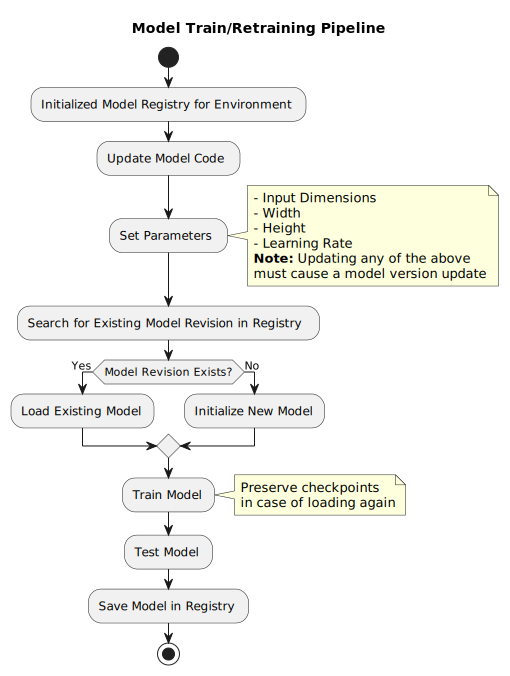

In [8]:
%%plantuml

@startuml
title Model Train/Retraining Pipeline

start

:Initialized Model Registry for Environment;
:Update Model Code;
:Set Parameters;
note right
  - Input Dimensions
  - Width
  - Height
  - Learning Rate
  **Note:** Updating any of the above 
  must cause a model version update
end note

:Search for Existing Model Revision in Registry;
if (Model Revision Exists?) then (Yes)
  :Load Existing Model;
else (No)
  :Initialize New Model;
endif

:Train Model;
note right
  - Preserve checkpoints in case of loading again
  - Store base line training data metrics for data drift calculation
end note

:Test Model;

:Save Model in Registry;

stop
@enduml

### Pipeline Code

In [14]:
import numpy as np

# Creating training data
training_samples = 100
training_data = np.random.random((training_samples, 3))

telemetry = Telemetry(level=logging.INFO)
registry = KohonenMapRegistry('registry', environment='dev', telemetry=telemetry)

MODEL_VERSION = 3

# must update MODEL_VERSION for these
width = 100
height = 100
learning_rate = 0.1
input_dims = 3
max_iterations = 1000

# No need to update MODEL_VERSION for these
training_checkpoint = int(max_iterations * 0.1)

last_revision = registry.load_latest(
  code_version=KohonenMap.current_code_version(), 
  version=MODEL_VERSION
)

if last_revision:
    kmap = last_revision
else:
    kmap = KohonenMap(
        width=width,
        height=height,
        learning_rate=learning_rate,
        input_dim=input_dims,
        model_version=MODEL_VERSION,
        model_last_revision= 0,
        max_iterations=max_iterations,
        telemetry=telemetry
    )

kmap.train(training_data, training_checkpoint=training_checkpoint)

# TODO: Test model

registry.save(kmap)

Kohonen fitting iterations: 100%|██████████| 1000/1000 [01:10<00:00, 14.10it/s, validation=Mean distance: 0.0076]


# Inference pipeline

The inference pipline is used for inferences. It has the following steps. 

- Init the environment registery
- Fetch the latest model
- Run it (In this case, I am going to run it by testing 10 data points and print the image of the map)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

telemetry = Telemetry(level=logging.ERROR)

registry = KohonenMapRegistry('registry', environment='dev', telemetry=telemetry)

kmap = registry.load_latest()
if kmap is None:
  raise Exception("No valid model available in registry")

print(f"Using Kohonen Map ({kmap.model_code_version}.{kmap.model_version}.{kmap.model_last_revision})")

# Defining some inference data
inference_input_dims = kmap.input_dim
infernce_samples = 100
inference_data = np.random.random((infernce_samples, inference_input_dims))

result = kmap.infer_with_metrics(inference_data)
inference = result['inferences']
print(f"Inference metrics = {result['log_string']}")

# Displaying data
if kmap.weights.shape[-1] == 3:
    image_path = f"images/kohonen-{registry.environment}-{kmap.model_code_version}.{kmap.model_version}.{kmap.model_last_revision}.png"
    plt.imsave(image_path, kmap.weights)
    log_message = f"Weights image saved at {image_path}"
    telemetry.log(log_message)
    print(log_message)

data: list[Tuple[np.ndarray, Tuple[int, int, float]]] = list(zip(inference_data, inference))
df = pd.DataFrame(data, columns=['data_point', 'coordinates'])
df[['x', 'y', 'distance']] = pd.DataFrame(df['coordinates'].tolist(), index=df.index)
df.drop(columns=['coordinates'], inplace=True)
df

Using Kohonen Map (1.3.4)
Inference metrics = Mean distance: 0.0841
Weights image saved at images/kohonen-dev-1.3.4.png


,data_point,x,y,distance
0,"[0.005758500963358393, 0.3843681931838334, 0.3...",7,13,0.225595
1,"[0.8459399770658972, 0.21708743824010512, 0.55...",76,28,0.053157
2,"[0.633359765804115, 0.8624745329024376, 0.7843...",42,56,0.052665
3,"[0.17338896262466863, 0.3467717955597768, 0.63...",16,32,0.028131
4,"[0.08457874845099211, 0.6337683021831391, 0.64...",0,55,0.041604
...,...,...,...,...
95,"[0.5582689801747065, 0.6038467788668417, 0.956...",37,41,0.080069
96,"[0.49770636300020954, 0.35296740153426187, 0.4...",27,21,0.103571
97,"[0.8803001621733294, 0.7768318140417791, 0.424...",64,69,0.080962
98,"[0.4198937854378194, 0.2991696522538595, 0.818...",37,9,0.078223
